# "Building a basic Neural Network from scratch - Kudzu"

- badges: true
- author: Anshuman Gupta

#### In this project, the idea is to write a classifier to differentiate between handwritten digits 3 and 8, from the MNIST database.

#### I will using a custom built neural network library called Kudzu.This has been developed as a part of KTF/Foundations course of Univ.ai (www.univ.ai). The source code for Kudzu Library and and this notebook can be found on my git-hub profile : www.https://github.com/anshuman6 under the folder project-solution. Any feedback and comments are welcome. Please feel free to email me at: anshuman6@gmail.com

#### 1. I will be using the MNIST database. 

#### 2. I will be comparing the results of the 4 layer NN to a standard logistic regression

##### Importing all the necessary libraries

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

##### The following command helps us download MNIST from notebook itself. You can skip this if you already have MNIST. You can also download it via your terminal.

In [3]:
!pip install mnist # Please note, it is commented out for now, you can remove comment if you want to install it

You should consider upgrading via the '/opt/hostedtoolcache/Python/3.6.11/x64/bin/python -m pip install --upgrade pip' command.


#### Preparing the Data

In [4]:
import mnist

In [5]:
train_images = mnist.train_images()
train_labels = mnist.train_labels()

In [6]:
train_images.shape, train_labels.shape

((60000, 28, 28), (60000,))

In [7]:
test_images = mnist.test_images()
test_labels = mnist.test_labels()

In [8]:
test_images.shape, test_labels.shape

((10000, 28, 28), (10000,))

2


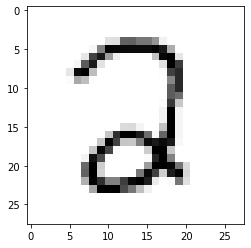

In [9]:
image_index = 7776 # You may select anything up to 60,000
print(train_labels[image_index]) 
plt.imshow(train_images[image_index], cmap='Greys')

## Filter data to get 3 and 8 out

In [10]:
train_filter = np.where((train_labels == 3 ) | (train_labels == 8))
test_filter = np.where((test_labels == 3) | (test_labels == 8))
X_train, y_train = train_images[train_filter], train_labels[train_filter]
X_test, y_test = test_images[test_filter], test_labels[test_filter]

##### We normalize the pizel values in the 0 to 1 range

In [11]:
X_train = X_train/255.
X_test = X_test/255.

And setup the labels as 1 (when the digit is 3) and 0 (when the digit is 8)

In [12]:
y_train = 1*(y_train==3)
y_test = 1*(y_test==3)

In [13]:
X_train.shape, X_test.shape

((11982, 28, 28), (1984, 28, 28))

##### We reshape the data to flatten the image pixels into a set of features or co-variates:

In [14]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
X_train.shape, X_test.shape

((11982, 784), (1984, 784))

##### Importing Kudzu library and its functionality

In [15]:
from kudzu.data import Data, Dataloader, Sampler
from kudzu.callbacks import AccCallback
from kudzu.loss import MSE
from kudzu.layer import Affine, Sigmoid
from kudzu.model import Model
from kudzu.optim import GD
from kudzu.train import Learner
from kudzu.callbacks import ClfCallback
from kudzu.layer import Sigmoid
from kudzu.layer import Relu

##### We are creating a class, just so that we can use it to store our parameters for us

In [16]:
class Config:
    pass
config = Config()
config.lr = 0.001
config.num_epochs = 250
config.bs = 50

##### Initializing Data

In [17]:
data = Data(X_train, y_train.reshape(-1,1))
loss = MSE()
opt = GD(config.lr)
sampler = Sampler(data, config.bs, shuffle=True)
dl = Dataloader(data, sampler)

##### Constructing 2 different layers, one for NN and one only for logistic regression.

##### Creating containers for data to be passed, to calculate accuracies

In [18]:
training_xdata = X_train
testing_xdata = X_test
training_ydata = y_train.reshape(-1,1)
testing_ydata = y_test.reshape(-1,1)

##### Initializing models and Running training loop: 

In [19]:
layers = [Affine("first", 784, 100), Relu("first"), Affine("second", 100, 100), Relu("second"), Affine("third", 100, 2), Affine("final", 2, 1), Sigmoid("final")]

model_neural = Model(layers)
model_logistic = Model([Affine("logits", 784, 1), Sigmoid("sigmoid")])

In [20]:
learner1 = Learner(loss, model_neural, opt, config.num_epochs)
acc1 = ClfCallback(learner1, config.bs, training_xdata , testing_xdata, training_ydata, testing_ydata)
learner1.set_callbacks([acc1])

In [21]:
learner1.train_loop(dl)

Epoch 0 Loss 0.24831675183318416
train accuracy is: 0.5593390085127692, test accuracy is 0.5584677419354839


Epoch 10 Loss 0.18144827484470544
train accuracy is: 0.8765648472709063, test accuracy is 0.8850806451612904


Epoch 20 Loss 0.09084475223388258
train accuracy is: 0.9096978801535637, test accuracy is 0.9153225806451613


Epoch 30 Loss 0.06006609397873812
train accuracy is: 0.9359873143047905, test accuracy is 0.9415322580645161


Epoch 40 Loss 0.047428618067487806
train accuracy is: 0.9483391754298114, test accuracy is 0.9536290322580645


Epoch 50 Loss 0.04093598492085981
train accuracy is: 0.9531797696544817, test accuracy is 0.9581653225806451


Epoch 60 Loss 0.03700321699260275
train accuracy is: 0.9562677349357369, test accuracy is 0.9606854838709677


Epoch 70 Loss 0.03430327112686595
train accuracy is: 0.9589384076114171, test accuracy is 0.9632056451612904


Epoch 80 Loss 0.03229547511954546
train accuracy is: 0.9615256217659823, test accuracy is 0.9632056451612904


Epoch 90 Loss 0.030696492171437745
train accuracy is: 0.9633617092305125, test accuracy is 0.9647177419354839


Epoch 100 Loss 0.029410998422465338
train accuracy is: 0.9647805040894676, test accuracy is 0.9652217741935484


Epoch 110 Loss 0.02831484192433442
train accuracy is: 0.9665331330328827, test accuracy is 0.9662298387096774


Epoch 120 Loss 0.02735598865204847
train accuracy is: 0.9676180938073777, test accuracy is 0.9682459677419355


Epoch 130 Loss 0.026513344143031414
train accuracy is: 0.9691203471874479, test accuracy is 0.9682459677419355


Epoch 140 Loss 0.025759842771106357
train accuracy is: 0.9701218494408279, test accuracy is 0.96875


Epoch 150 Loss 0.025082956337555185
train accuracy is: 0.971039893173093, test accuracy is 0.969758064516129


Epoch 160 Loss 0.024452580717993628
train accuracy is: 0.971540644299783, test accuracy is 0.9707661290322581


Epoch 170 Loss 0.023872438297463005
train accuracy is: 0.971707561342013, test accuracy is 0.9707661290322581


Epoch 180 Loss 0.023337208774735184
train accuracy is: 0.972291770989818, test accuracy is 0.9712701612903226


Epoch 190 Loss 0.02283261938040866
train accuracy is: 0.9731263562009681, test accuracy is 0.9712701612903226


Epoch 200 Loss 0.02235872513228548
train accuracy is: 0.9737940243698882, test accuracy is 0.9707661290322581


Epoch 210 Loss 0.021901263458592658
train accuracy is: 0.9742113169754631, test accuracy is 0.9712701612903226


Epoch 220 Loss 0.02147431574760907
train accuracy is: 0.9753797362710733, test accuracy is 0.9712701612903226


Epoch 230 Loss 0.02105566856494283
train accuracy is: 0.9759639459188784, test accuracy is 0.9712701612903226


Epoch 240 Loss 0.02064983170324835
train accuracy is: 0.9763812385244534, test accuracy is 0.9717741935483871


0.001901762935343059

##### Now running only the logistic regression based classification to compare results with NN

In [22]:
learner2 = Learner(loss, model_logistic, opt, config.num_epochs)
acc2 = ClfCallback(learner2, config.bs, training_xdata , testing_xdata, training_ydata, testing_ydata)
learner2.set_callbacks([acc2])

In [23]:
learner2.train_loop(dl)

Epoch 0 Loss 0.24532568726553802
train accuracy is: 0.6786846937072275, test accuracy is 0.6985887096774194


Epoch 10 Loss 0.1023678985016026
train accuracy is: 0.9174595226172593, test accuracy is 0.9254032258064516


Epoch 20 Loss 0.07825634725775625
train accuracy is: 0.9332331831079953, test accuracy is 0.9445564516129032


Epoch 30 Loss 0.06738201876618793
train accuracy is: 0.9396594892338508, test accuracy is 0.9495967741935484


Epoch 40 Loss 0.060921355905789926
train accuracy is: 0.9435820397262561, test accuracy is 0.954133064516129


Epoch 50 Loss 0.056544103941461386
train accuracy is: 0.9460023368385913, test accuracy is 0.9576612903225806


Epoch 60 Loss 0.053335574212660206
train accuracy is: 0.9478384243031214, test accuracy is 0.9596774193548387


Epoch 70 Loss 0.05085946618818462
train accuracy is: 0.9501752628943415, test accuracy is 0.9596774193548387


Epoch 80 Loss 0.04887464788715898
train accuracy is: 0.9513436821899516, test accuracy is 0.9601814516129032


Epoch 90 Loss 0.04723552982318931
train accuracy is: 0.9524286429644466, test accuracy is 0.9632056451612904


Epoch 100 Loss 0.045853761049505115
train accuracy is: 0.9536805207811717, test accuracy is 0.9637096774193549


Epoch 110 Loss 0.04466825478350297
train accuracy is: 0.9549323985978968, test accuracy is 0.9642137096774194


Epoch 120 Loss 0.04363577739747555
train accuracy is: 0.9559339008512769, test accuracy is 0.9642137096774194


Epoch 130 Loss 0.04272631310225387
train accuracy is: 0.956685027541312, test accuracy is 0.9642137096774194


Epoch 140 Loss 0.04191572049785711
train accuracy is: 0.956935403104657, test accuracy is 0.9642137096774194


Epoch 150 Loss 0.04118822808871331
train accuracy is: 0.957603071273577, test accuracy is 0.9652217741935484


Epoch 160 Loss 0.04052939597003492
train accuracy is: 0.9584376564847271, test accuracy is 0.9652217741935484


Epoch 170 Loss 0.03993021117635616
train accuracy is: 0.9590218661325322, test accuracy is 0.9652217741935484


Epoch 180 Loss 0.039380025528550855
train accuracy is: 0.9591053246536472, test accuracy is 0.9647177419354839


Epoch 190 Loss 0.03887390017307573
train accuracy is: 0.9593557002169921, test accuracy is 0.9647177419354839


Epoch 200 Loss 0.038406585042596655
train accuracy is: 0.9594391587381071, test accuracy is 0.9637096774193549


Epoch 210 Loss 0.037971252333704145
train accuracy is: 0.9595226172592222, test accuracy is 0.9642137096774194


Epoch 220 Loss 0.037566314857098215
train accuracy is: 0.9596895343014522, test accuracy is 0.9642137096774194


Epoch 230 Loss 0.03718635920254738
train accuracy is: 0.9601902854281422, test accuracy is 0.9642137096774194


Epoch 240 Loss 0.03683107139096968
train accuracy is: 0.9603572024703723, test accuracy is 0.9642137096774194


0.05328099981799253

### Comparing results of NN and LR

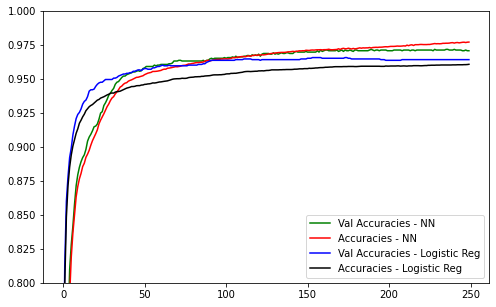

In [24]:
plt.figure(figsize=(8,5))
plt.plot(acc1.val_accuracies, 'g-', label = "Val Accuracies - NN")
plt.plot(acc1.accuracies, 'r-', label = "Accuracies - NN")
plt.plot(acc2.val_accuracies, 'b-', label = "Val Accuracies - Logistic Reg")
plt.plot(acc2.accuracies, 'k-', label = "Accuracies - Logistic Reg")
plt.ylim(0.8,1) ## for a more spread out view
plt.legend()

### Clearly NN has a better accuracy over LR; NN is overfitting - Validation accuracy (green) has dropped below training accuracy (orange), also they are diverging. This problem is not seen in LR

##### Now we will be moving through the network, till the output of the second last affine where we get a 2 dimensional output. We will be plotting this 2d output and probability contours

In [25]:
model_new = Model(layers[:-2])

In [26]:
plot_testing = model_new(testing_xdata)

##### Plotting the scatter plot of points and color coding by class

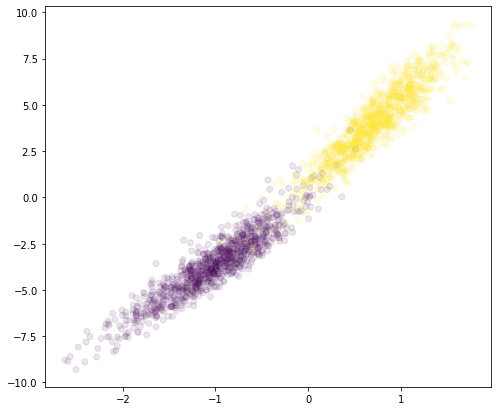

In [27]:
plt.figure(figsize=(8,7))
plt.scatter(plot_testing[:,0], plot_testing[:,1], alpha = 0.1, c = y_test.ravel());

##### Plotting probability contours

In [28]:
model_prob = Model(layers[-2:]) ## picking only last two layers to get probability. That is affine followed by sigmoid

In [29]:
xgrid = np.linspace(-4, 1, 100) ## Adjust these values based on above chart, roughly -4 to 1
ygrid = np.linspace(-7.5, 7.5, 100) ## Adjust these values based on above chart, roughly -7.5, 7.5
xg, yg = np.meshgrid(xgrid, ygrid)
# xg and yg are now both 100X100, lets convert them to single arrays 

xg_interim = np.ravel(xg)
yg_interim = np.ravel(yg)

## xg_interim, yg_interim are now arrays of len 10000, now we will stack them and then transpose to get desired shape of n rows, 2 columns

X_interim = np.vstack((xg_interim, yg_interim)) ## Please note vstack takes in a tuple
X = X_interim.T

## We want a shape of n rows and 2 columns to be able to feed this to last affine
## This last affine takes only two columns, hence the above transformation
probability_contour = model_prob(X).reshape(100,100) ## to make it consistent with xg, yg

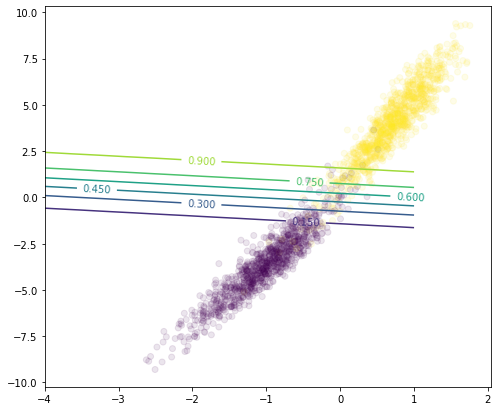

In [30]:
plt.figure(figsize=(8,7))
plt.scatter(plot_testing[:,0], plot_testing[:,1], alpha = 0.1, c = y_test.ravel())
contours = plt.contour(xg,yg,probability_contour)
plt.clabel(contours, inline = True );